<a href="https://colab.research.google.com/github/rvp3011/Lab0/blob/main/Practice_Activity_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


Data preparation complete. Shapes of the resulting datasets:
X_train shape: (218, 6)
X_test shape: (55, 6)
y_train shape: (218,)
y_test shape: (55,)

--------------------------------------------------

## Train K-Nearest Neighbors (KNN) Classifier
KNN Accuracy: 0.4182

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.85      0.64        26
           1       0.00      0.00      0.00        12
           2       0.14      0.07      0.09        15
           3       0.00      0.00      0.00         2

    accuracy                           0.42        55
   macro avg       0.16      0.23      0.18        55
weighted avg       0.28      0.42      0.33        55


--------------------------------------------------

## Train Decision Tree Classifier
Decision Tree Accuracy: 0.3818

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.65      0.57        26
   

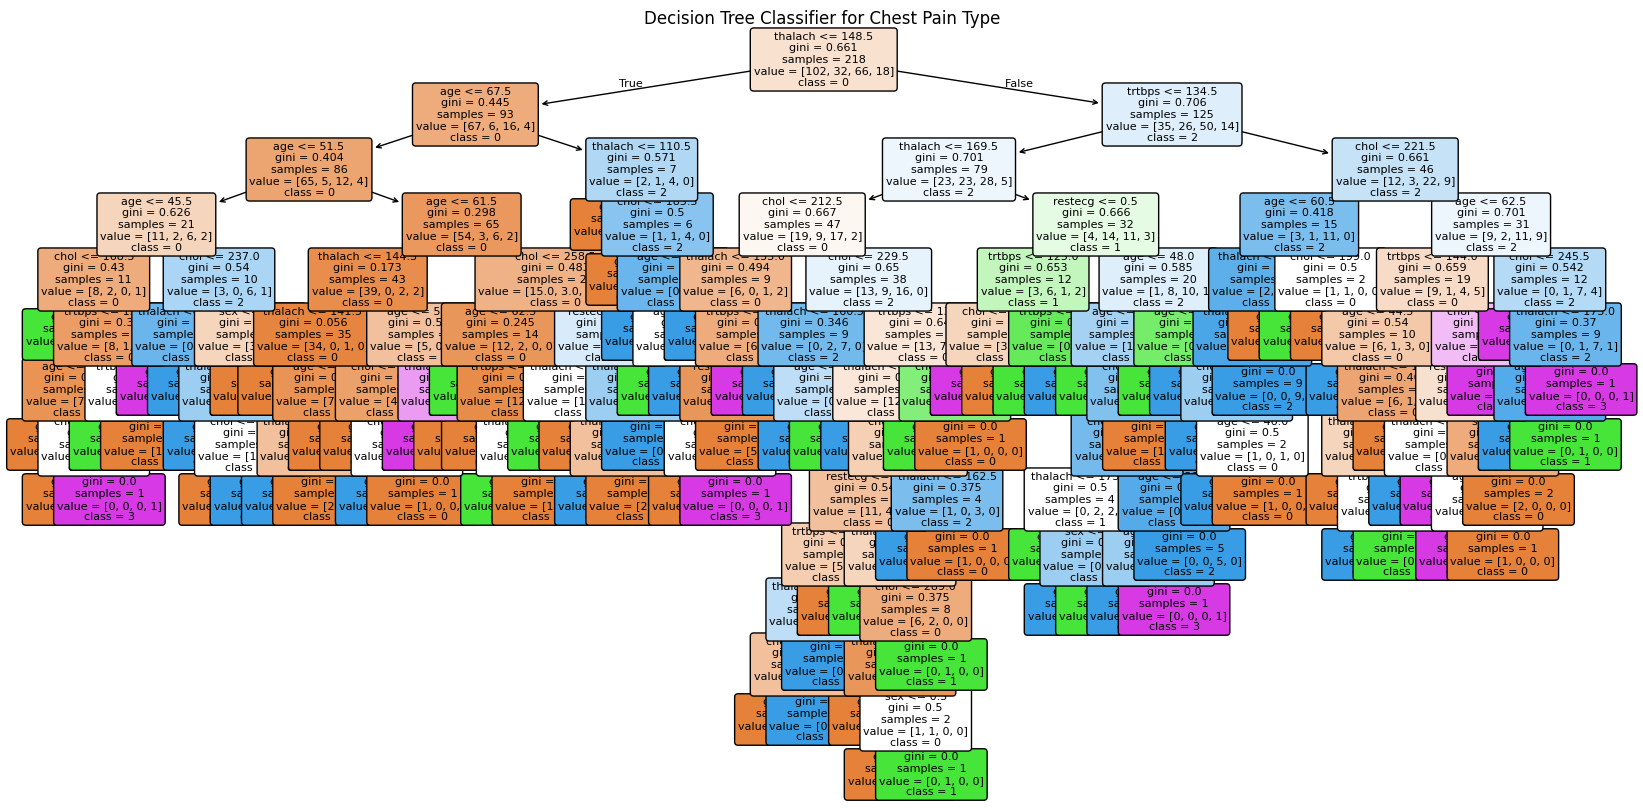


--------------------------------------------------

## Train Linear Discriminant Analysis (LDA) Classifier
LDA Accuracy: 0.4909

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        26
           1       0.00      0.00      0.00        12
           2       0.38      0.40      0.39        15
           3       0.00      0.00      0.00         2

    accuracy                           0.49        55
   macro avg       0.24      0.30      0.26        55
weighted avg       0.37      0.49      0.42        55


--------------------------------------------------



In [12]:
X = ha.drop(columns=['cp', 'output'])
y = ha['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data preparation complete. Shapes of the resulting datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n" + "-" * 50 + "\n")


print("## Train K-Nearest Neighbors (KNN) Classifier")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))
print("\n" + "-" * 50 + "\n")


print("## Train Decision Tree Classifier")
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
y_pred_dtree = dtree_model.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree, zero_division=0))
print("\n" + "-" * 50 + "\n")

plt.figure(figsize=(20, 10))
plot_tree(dtree_model, filled=True, feature_names=X.columns.tolist(), class_names=[str(c) for c in sorted(y.unique())], rounded=True, fontsize=8)
plt.title("Decision Tree Classifier for Chest Pain Type")
plt.show()
print("\n" + "-" * 50 + "\n")


print("## Train Linear Discriminant Analysis (LDA) Classifier")
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {accuracy_lda:.4f}")
print("\nLDA Classification Report:")
print(classification_report(y_test, y_pred_lda, zero_division=0))
print("\n" + "-" * 50 + "\n")

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_ovr = ha.drop(columns=['cp', 'output'])

f1_scores = {}

for cp_category in sorted(ha['cp'].unique()):
    print(f"\n--- OvR for cp_category = {cp_category} ---")

    target_col_name = f'cp_is_{cp_category}'
    ha[target_col_name] = (ha['cp'] == cp_category).astype(int)
    y_ovr = ha[target_col_name]

    X_train_ovr, X_test_ovr, y_train_ovr, y_test_ovr = train_test_split(X_ovr, y_ovr, test_size=0.2, random_state=42, stratify=y_ovr)

    log_reg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
    log_reg_model.fit(X_train_ovr, y_train_ovr)

    y_pred_ovr = log_reg_model.predict(X_test_ovr)

    f1 = f1_score(y_test_ovr, y_pred_ovr)
    f1_scores[cp_category] = f1
    print(f"Logistic Regression F1 Score for {target_col_name}: {f1:.4f}")

    print(f"Value counts for {target_col_name} (Train):\n{y_train_ovr.value_counts()}")
    print(f"Value counts for {target_col_name} (Test):\n{y_test_ovr.value_counts()}")

best_category = max(f1_scores, key=f1_scores.get)
print(f"\n\n--- Summary ---")
print(f"F1 Scores for each OvR category: {f1_scores}")
print(f"The OvR approach was best at distinguishing category {best_category} with an F1 Score of {f1_scores[best_category]:.4f}.")

for cp_category in sorted(ha['cp'].unique()):
    target_col_name = f'cp_is_{cp_category}'
    if target_col_name in ha.columns:
        ha = ha.drop(columns=[target_col_name])





--- OvR for cp_category = 0 ---
Logistic Regression F1 Score for cp_is_0: 0.6122
Value counts for cp_is_0 (Train):
cp_is_0
0    116
1    102
Name: count, dtype: int64
Value counts for cp_is_0 (Test):
cp_is_0
0    29
1    26
Name: count, dtype: int64

--- OvR for cp_category = 1 ---
Logistic Regression F1 Score for cp_is_1: 0.3333
Value counts for cp_is_1 (Train):
cp_is_1
0    183
1     35
Name: count, dtype: int64
Value counts for cp_is_1 (Test):
cp_is_1
0    46
1     9
Name: count, dtype: int64

--- OvR for cp_category = 2 ---
Logistic Regression F1 Score for cp_is_2: 0.4545
Value counts for cp_is_2 (Train):
cp_is_2
0    153
1     65
Name: count, dtype: int64
Value counts for cp_is_2 (Test):
cp_is_2
0    39
1    16
Name: count, dtype: int64

--- OvR for cp_category = 3 ---
Logistic Regression F1 Score for cp_is_3: 0.1875
Value counts for cp_is_3 (Train):
cp_is_3
0    202
1     16
Name: count, dtype: int64
Value counts for cp_is_3 (Test):
cp_is_3
0    51
1     4
Name: count, dtype: in

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [16]:
ovr_pairs = [(0, 1), (0, 2), (0, 3)]
roc_auc_scores = {}

for category1, category2 in ovr_pairs:
    print(f"\n--- OvO for cp categories: {category1} vs {category2} ---")

    df_subset = ha[ha['cp'].isin([category1, category2])].copy()

    X_ovo = df_subset.drop(columns=['cp', 'output'])
    y_ovo = df_subset['cp']

    X_train_ovo, X_test_ovo, y_train_ovo, y_test_ovo = train_test_split(
        X_ovo, y_ovo, test_size=0.2, random_state=42, stratify=y_ovo
    )

    print(f"Subset shapes: X_train={X_train_ovo.shape}, y_train={y_train_ovo.shape}")
    print(f"X_test={X_test_ovo.shape}, y_test={y_test_ovo.shape}")
    print(f"Train value counts: {y_train_ovo.value_counts().to_dict()}")
    print(f"Test value counts: {y_test_ovo.value_counts().to_dict()}")

    log_reg_model_ovo = LogisticRegression(solver='liblinear', random_state=42)
    log_reg_model_ovo.fit(X_train_ovo, y_train_ovo)

    classes = log_reg_model_ovo.classes_
    if len(classes) == 2:

        y_test_binary = y_test_ovo.map({classes[0]: 0, classes[1]: 1})
        y_pred_proba_ovo = log_reg_model_ovo.predict_proba(X_test_ovo)[:, 1]
        roc_auc = roc_auc_score(y_test_binary, y_pred_proba_ovo)
    else:
        roc_auc = None
        print("Error: More than two classes found in OvO subset.")

    roc_auc_scores[(category1, category2)] = roc_auc
    print(f"Logistic Regression ROC-AUC for {category1} vs {category2}: {roc_auc:.4f}")

best_pair = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"\n\n--- Summary ---")
print(f"ROC-AUC Scores for each OvO pair: {roc_auc_scores}")
print(f"The OvO approach was best at distinguishing the pair {best_pair} with a ROC-AUC score of {roc_auc_scores[best_pair]:.4f}.")


--- OvO for cp categories: 0 vs 1 ---
Subset shapes: X_train=(137, 6), y_train=(137,)
X_test=(35, 6), y_test=(35,)
Train value counts: {0: 102, 1: 35}
Test value counts: {0: 26, 1: 9}
Logistic Regression ROC-AUC for 0 vs 1: 0.6368

--- OvO for cp categories: 0 vs 2 ---
Subset shapes: X_train=(167, 6), y_train=(167,)
X_test=(42, 6), y_test=(42,)
Train value counts: {0: 102, 2: 65}
Test value counts: {0: 26, 2: 16}
Logistic Regression ROC-AUC for 0 vs 2: 0.8221

--- OvO for cp categories: 0 vs 3 ---
Subset shapes: X_train=(118, 6), y_train=(118,)
X_test=(30, 6), y_test=(30,)
Train value counts: {0: 102, 3: 16}
Test value counts: {0: 26, 3: 4}
Logistic Regression ROC-AUC for 0 vs 3: 0.5481


--- Summary ---
ROC-AUC Scores for each OvO pair: {(0, 1): np.float64(0.6367521367521367), (0, 2): np.float64(0.8221153846153846), (0, 3): np.float64(0.548076923076923)}
The OvO approach was best at distinguishing the pair (0, 2) with a ROC-AUC score of 0.8221.
